# Chapter 2: Initial Image Benchmarking

Dear user, we will be conducting benchmarking with 2 competitor products, \
where we query a LLM on the difference it can identify purely from the product vs competitor images.

## TO DO SECTION

In [1]:
'''
Dear user, enter your Product here!
'''

product = "Scoot 787"

In [ ]:
'''
Dear user, please download pictures of components in your product and 2 competitors' products.
Save them in the others/{component_name} folder as product.jpg, comp_1.jpg and comp_2.jpg respectively.
'''

## RUN AS INTENDED (DO NOT CHANGE ANYTHING.)

### Set Up

In [2]:
! pip install openai==1.13.3

DEPRECATION: google-images-search 1.4.6 has a non-standard dependency specifier click>=7.0<=8.1.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of google-images-search or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [3]:
""" Set up OpenAI API key """
import os
from dotenv import load_dotenv

load_dotenv()

key = os.getenv("OPENAI_API_KEY")

### Image Query into LLM to identify Differences

##### Image Query Helper Functions

In [50]:
import base64
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageOps
from openai import OpenAI

""" Display images """
def display_images(product_image_path, comp_image_paths):
    product_image = Image.open(product_image_path)
    product_image = ImageOps.fit(product_image, (200, 150), Image.BICUBIC)          # Open and resize product image

    fig, axes = plt.subplots(1, len(comp_image_paths) + 1, figsize=(15, 5))
    
    axes[0].imshow(product_image)                                                   # Display product image
    axes[0].set_title('B787')
    axes[0].axis('off')
    
    for i, comp_image_path in enumerate(comp_image_paths):                          # Display competitor images
        comp_image = Image.open(comp_image_path)
        comp_image = ImageOps.fit(comp_image, (200, 150), Image.BICUBIC)
        
        axes[i + 1].imshow(comp_image)
        axes[i + 1].set_title(f'Competitor {i+1}')
        axes[i + 1].axis('off')
        
    plt.show()

""" Encode image to base64 """
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

""" Image Query Comparison """
def compare_image_query(component, prompt):
    product_image_path = f'others/{component}/product.jpg'
    comp_image_paths = [f'others/{component}/comp_1.jpg', f'others/{component}/comp_2.jpg']

    product_base64 = encode_image(product_image_path)
    comp_base64_images = [encode_image(path) for path in comp_image_paths]

    messages = [{
        "role": "user",
        "content": [{"type": "text", "text": prompt}]
    }]

    messages.append({
        "role": "user",
        "content": [{"type": "image_url", "image_url": f"data:image/jpeg;base64,{product_base64}"}]
    })

    for base64_image in comp_base64_images:
        messages.append({
            "role": "user",
            "content": [{"type": "image_url", "image_url": f"data:image/jpeg;base64,{base64_image}"}]
        })

    client = OpenAI()

    response = client.chat.completions.create(
        model="gpt-4-vision-preview",
        messages=messages,
        max_tokens=300  # max length of response
    )

    display_images(product_image_path, comp_image_paths)
    print(response.choices[0].message.content)

## TO DO SECTION

#### Image Query Results

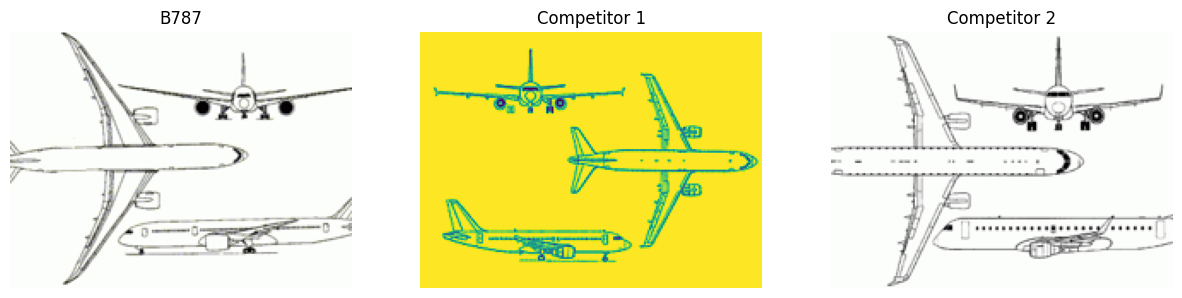

1. Boeing 787:
   - Overall Aircraft Configuration: Twin-engine, long-range, wide-body aircraft with a swept wing design.
   - Wing Geometry: Raked wingtips for improved aerodynamic efficiency.
   - Fuselage Shape: Smooth, rounded nose with a cylindrical midsection.

2. Image 2 Aircraft:
   - Overall Aircraft Configuration: Appears to be a twin-engine, single-aisle aircraft, likely a medium-range airliner.
   - Wing Geometry: Straight wing design with winglets at the tips for drag reduction.
   - Fuselage Shape: Traditional cylindrical fuselage with a slightly more pointed nose compared to the B787.

3. Image 3 Aircraft:
   - Overall Aircraft Configuration: Twin-engine, wide-body airliner with a large wingspan and pronounced wing dihedral.
   - Wing Geometry: Swept wing design with blended winglets.
   - Fuselage Shape: Wide-body with distinct bulbous shape, indicating a large cargo or passenger capacity; the nose is more rounded than the second aircraft but less so than the B787.


In [56]:
component = "aircraft"
prompt = f"You are given 3 different images of a {component}.\n \
        For each {component}, compare and identify the differences in: \n \
        1. Overall Aircraft Configuration \n \
        2. Wing Geometry \n \
        3. Fuselage Shape \n \
        Mention that the first image is from a B787. The other images are from other competitor aircrafts. \n \
        Do not output anything else. Keep the answer as concise as possible."

compare_image_query(component, prompt)

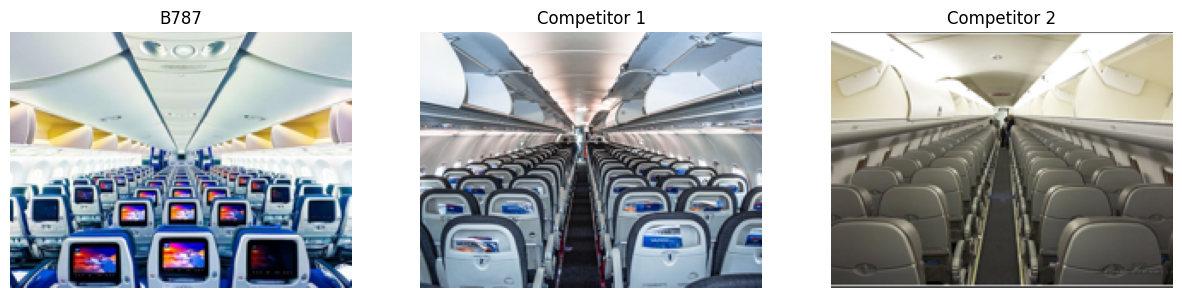

First image (B787):
1. Passenger Comfort: High comfort with modern individual entertainment systems and larger windows.
2. Layout: 3-3-3 seating configuration with spacious overhead bins.
3. Accessibility: Wide aisles and high-ceiling cabin for easier movement.

Second image:
1. Passenger Comfort: Individual entertainment screens but smaller windows than B787.
2. Layout: Standard 3-3 seating configuration with overhead bins.
3. Accessibility: Narrower aisle than B787, adequate for movement.

Third image:
1. Passenger Comfort: Lacks individual entertainment systems and has smaller windows.
2. Layout: Tight 2-2 seating configuration, less spacious overhead bins.
3. Accessibility: Very narrow aisle, less convenient for passenger flow.


In [52]:
component = "plane_interior"
prompt = f"You are given 3 different images of a {component}.\n \
        For each {component}, compare and identify the differences in: \n \
        1. Passenger Comfort \n \
        2. Layout \n \
        3. Accessibility \n \
        Mention that the first image is from a B787. The other images are from other competitor aircrafts. \n \
        Do not output anything else. Keep the answer as concise as possible."

compare_image_query(component, prompt)

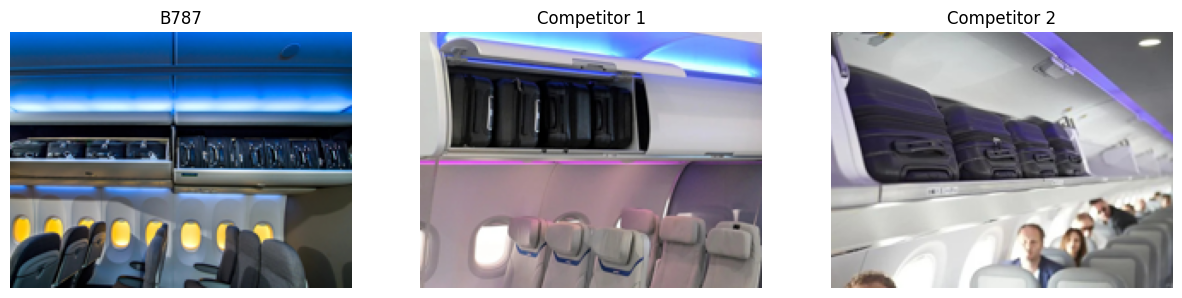

Image 1 (from B787):
1. Mechanism: Features a pivot bin design that swings down for loading luggage.
2. Baggage Storage Space: Accommodates bags placed on their sides, maximizing volume and allowing for stowage of larger items.
3. Passenger Safety: Wide opening with a controlled, smooth mechanism minimizes the risk of falling items during opening and closure.

Image 2:
1. Mechanism: It appears to have a drop-down hinge mechanism similar to the B787 but with a different bin design.
2. Baggage Storage Space: Similar storage capacity to the B787, but the curvature of the bin may slightly limit the ability to store larger bags.
3. Passenger Safety: Features a wide opening and smooth edges, which should enhance safety during operation, similar to the B787's design.

Image 3:
1. Mechanism: The bins open upwards and appear to have a straightforward hinge mechanism without a pivot function.
2. Baggage Storage Space: Offers more depth in the bin, which may accommodate more or differently shaped

In [62]:
component = "overhead_bin"
prompt = f"You are given 3 different images of a {component}.\n \
        For each {component}, compare and identify the differences in: \n \
        1. Mechanism \n \
        2. Baggage Storage Space \n \
        3. Passenger Safety \n \
        Mention that the first image is from a B787. The other images are from other competitor aircrafts. \n \
        Do not output anything else. Keep the answer as concise as possible."

compare_image_query(component, prompt)